In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

## Load distance matrix

In [2]:
cj_matrix=np.load("../input/condensed_distance_matrix_jaccard.npy")

## Perform clustering

In [3]:
Z = linkage(cj_matrix, 'average')

In [4]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

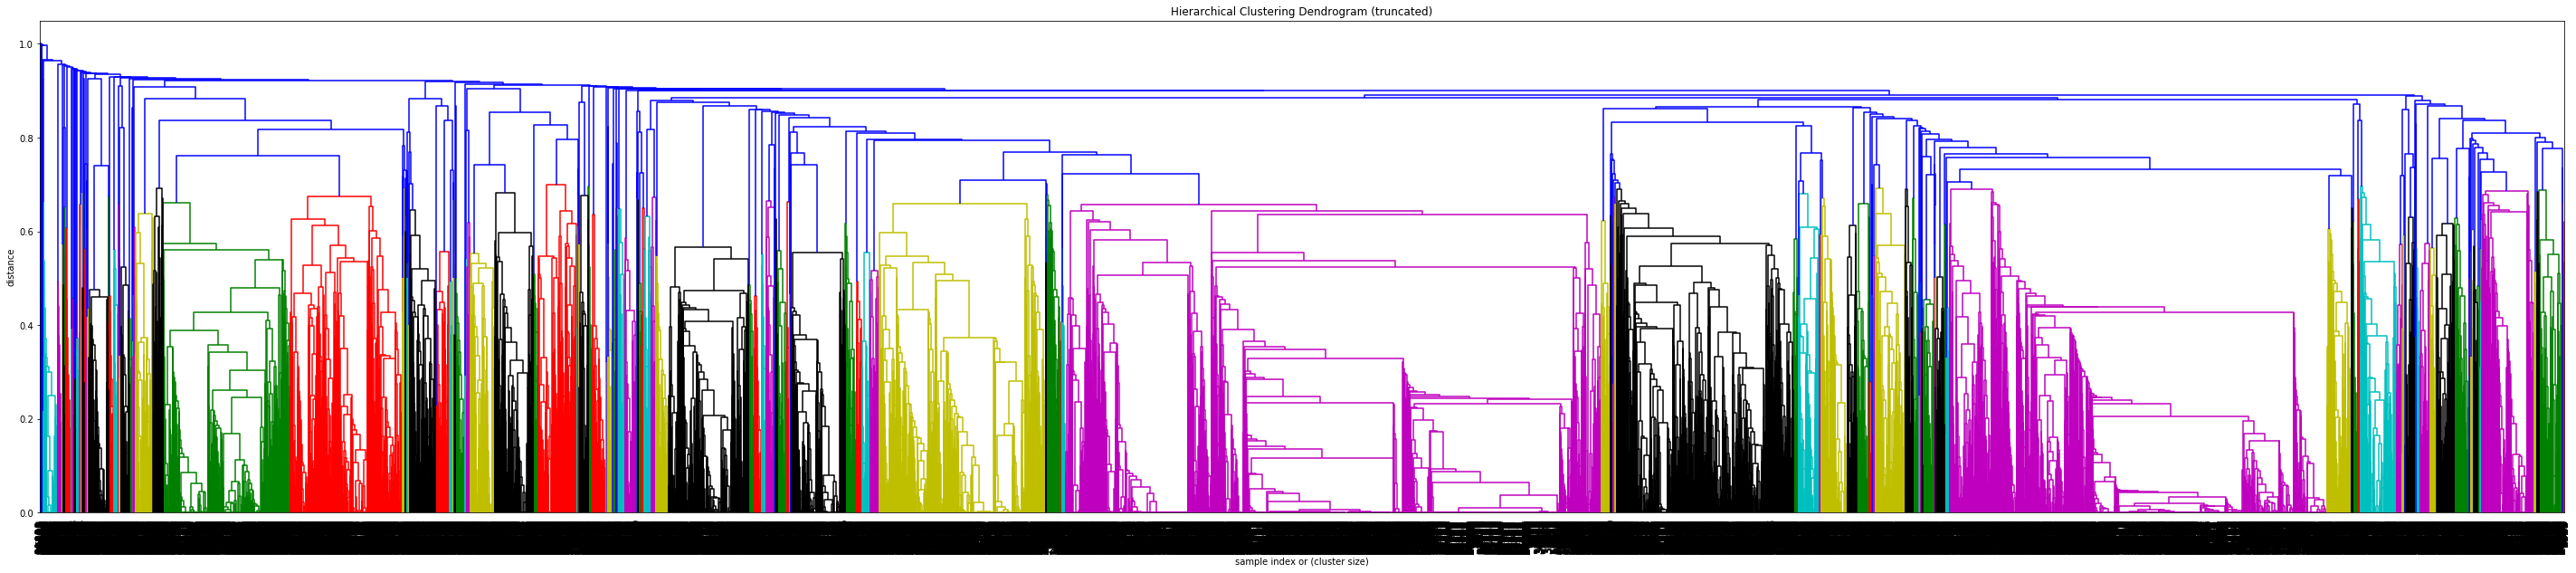

In [5]:
fig = plt.figure(figsize=(50, 10))
fancy_dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

## Truncate clustering & evaluate performance

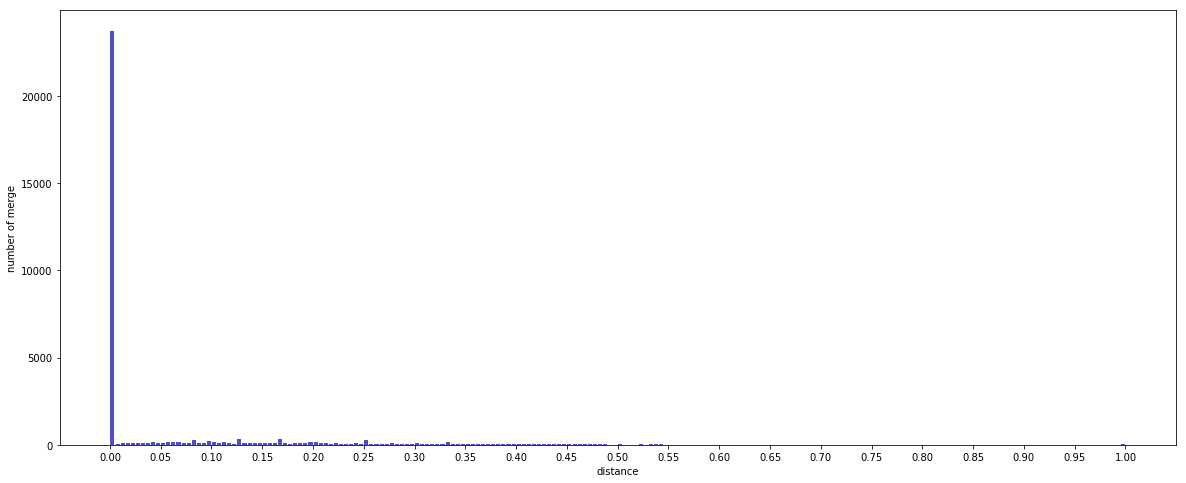

In [6]:
X = [l[2] for l in Z]

fig = plt.figure(figsize=(20, 8))
n, bins, patches = plt.hist(X, bins=200, density=False, cumulative=False, color='#0504aa',
                            alpha=0.7, rwidth=0.8)
plt.xlabel('distance')
plt.ylabel('number of merge')
plt.xticks(np.arange(0,1+0.05,0.05))
plt.show()

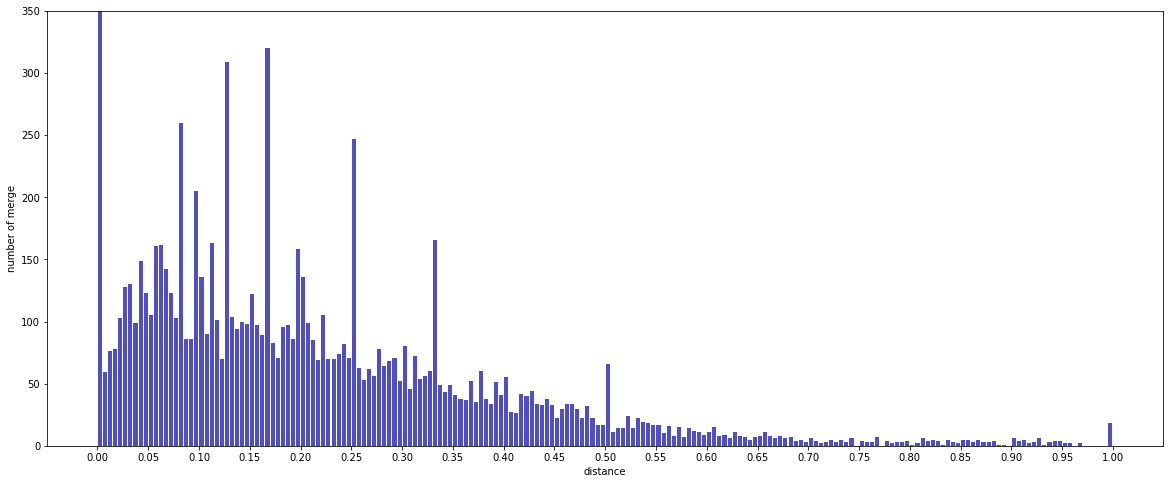

In [7]:
fig = plt.figure(figsize=(20, 8))
plt.hist(X, bins=200, density=False, cumulative=False, color='#0504aa',
                            alpha=0.7, rwidth=0.8)
plt.xlabel('distance')
plt.ylabel('number of merge')
plt.xticks(np.arange(0,1+0.05,0.05))
plt.ylim(top=350)
plt.show()

In [8]:
max_d = 0.005
clusters = fcluster(Z, max_d, criterion='distance')
len(set(clusters))

8957

In [9]:
nums_of_cluster = []
s_scores = []
distance_matrix = squareform(cj_matrix)
for k in range(2, 500):
    clusters = fcluster(Z, k, criterion='maxclust')
    s_score = metrics.silhouette_score(distance_matrix, clusters, metric='precomputed')
    nums_of_cluster.append(k)
    s_scores.append(s_score)

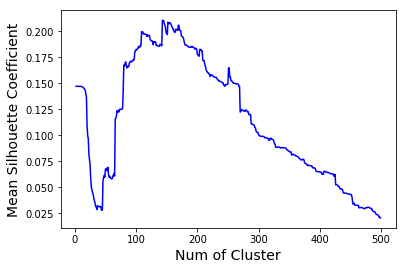

In [10]:
plt.plot(nums_of_cluster, s_scores, c="blue")

plt.xlabel("Num of Cluster", fontsize=14)
plt.ylabel("Mean Silhouette Coefficient", fontsize=14)
plt.show()

In [11]:
'''nums_of_cluster = []
s_scores = []
for k in range(9810, 9820):
    clusters = fcluster(Z, k, criterion='maxclust')
    s_score = metrics.silhouette_score(distance_matrix, clusters, metric='precomputed', sample_size=6500)
    nums_of_cluster.append(k)
    s_scores.append(s_score)'''

"nums_of_cluster = []\ns_scores = []\nfor k in range(9810, 9820):\n    clusters = fcluster(Z, k, criterion='maxclust')\n    s_score = metrics.silhouette_score(distance_matrix, clusters, metric='precomputed', sample_size=6500)\n    nums_of_cluster.append(k)\n    s_scores.append(s_score)"

In [12]:
max(s_scores)

0.21078955549088274

In [13]:
nums_of_cluster[s_scores.index(max(s_scores))]

143

In [14]:
k = nums_of_cluster[s_scores.index(max(s_scores))]
clusters = fcluster(Z, k, criterion='maxclust')

In [15]:
lists = []

with open("../input/anonymous-msweb.data", "r") as f:
    for line in f:
        if line[0] == "C":
            key = int(line[-6:-1])
            lists.append([key,[]]) #[[10001]]
        if line[0] == "V" and key > 0:
            read_value = int(line[2:6])
            lists[-1][1].append(read_value)

In [16]:
dict_segments = dict()
for i, group_num in enumerate(clusters):
    if group_num in dict_segments:
        dict_segments[group_num].append(lists[i][0])
    else:
        dict_segments[group_num] = [lists[i][0]]

In [17]:
df_segments = pd.DataFrame(list(dict_segments.items()), columns=['Group Num', 'Visitor'])

In [18]:
df_segments.head()

,Group Num,Visitor
0,93,"[10001, 10002, 10003, 10006, 10019, 10020, 100..."
1,16,"[10004, 10815, 11182, 16407, 16589, 17323, 194..."
2,22,"[10005, 10321, 13053, 13235, 15131, 15247, 187..."
3,85,"[10007, 10048, 10062, 10079, 10088, 10094, 101..."
4,110,"[10008, 10018, 10022, 10042, 10043, 10066, 100..."
